# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [59]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [60]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [61]:
number_of_rows = df.shape[0]
number_of_rows

294478

**c.** The number of unique users in the dataset.

In [62]:
number_of_unique_users = df.user_id.nunique()
number_of_unique_users

290584

**d.** The proportion of users converted.

In [63]:
pr_of_converted = df.converted.mean()
pr_of_converted

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [64]:
treat_and_old = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
treat_and_old

3893

**f.** Do any of the rows have missing values?

In [65]:
df.isnull().sum().sum()

0

 for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [66]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
treat_and_new = df.query(" group == 'treatment' and landing_page == 'new_page'")
control_and_old =df.query(" group == 'control' and landing_page == 'old_page'")
df2 = treat_and_new.append(control_and_old)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [67]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0


Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [68]:
unique_user_ids = df2.user_id.nunique()
unique_user_ids

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [69]:
print('The repeated user_id is ',(df2.user_id.value_counts()).index[0])

The repeated user_id is  773192


**c.** Display the rows for the duplicate **user_id**? 

In [70]:
duplicated_user_id = df[df['user_id'] == (df2.user_id.value_counts()).index[0]]
duplicated_user_id

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [71]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(duplicated_user_id.index[0] , axis =0 , inplace =True)
# Check again if the row with a duplicate user_id is deleted or not
(df2.user_id.value_counts()).iloc[0]

1


Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [72]:
𝑝𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 = df2.converted.mean()
𝑝𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [73]:
p_control = df2.query(" group == 'control'")['converted'].mean()
p_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [74]:
p_treatment = df2.query(" group == 'treatment'")['converted'].mean()
p_treatment

0.11880806551510564

In [75]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [76]:
p_new = df2.query("landing_page == 'new_page' ").shape[0] / df2.landing_page.shape[0]
p_new

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


**the null hypothesis is old page perform better than or equal the new page , and the alternative hypothesis is the new page perform better than the old page**
 
***$H_0$ ∶ $p_{new}$- $p_{old}$ ≤ 0***
  
***$H_1$ ∶ $p_{new}$- $p_{old}$ > 0***           
               



Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. 


In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [77]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [78]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [79]:
new = df2.query(" landing_page == 'new_page'")
n_of_new = new.user_id.nunique()
n_of_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [80]:
old = df2.query(" landing_page == 'old_page'")
n_of_old = old.user_id.nunique()
n_of_old

145274

In [81]:
# Calculate the actual difference (obs_diff) between the conversion rates for p_new and .p_old under the null
difference_rate = p_new - p_old
difference_rate

0.0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [82]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1] ,p = ( 1-p_new , p_new), size= n_of_new )
new_page_converted.mean()

0.12030830637946459

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [83]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1] ,p = (1-p_new,p_new),size =n_of_old )
old_page_converted.mean()


0.11765353745336399

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [84]:
differenc = ( new_page_converted.mean() - old_page_converted.mean() )
differenc

0.0026547689261006008


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [85]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1] ,p = ( 1-p_new , p_new), size= n_of_new )
    
    old_page_converted = np.random.choice([0,1] ,p = (1-p_new,p_new),size =n_of_old )
    
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

    
    

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



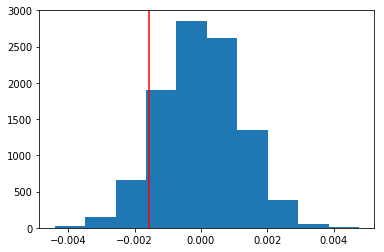

In [86]:
plt.hist(p_diffs);
plt.axvline( x = obs_diff , color ='r');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [87]:
# convert p_diffs to array
p_diffs = np.array( p_diffs)

In [88]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0 ,  p_diffs.std() ,  p_diffs.size)

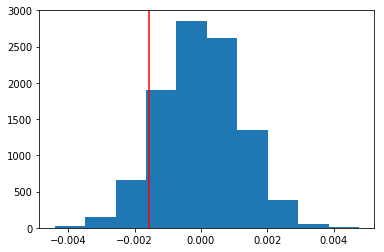

In [89]:
# plot the the null distribution and the observed statistic
plt.hist( p_diffs);
plt.axvline(x = obs_diff , color='red')

In [90]:
(null_vals > obs_diff).mean()

0.90910000000000002

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 



**In part j , we computed the p_value which means that the probability of observing our statistic (or one more 
extreme in favor of the alternative) if the null hypothesis is true ,where if (p < α) then we suggest to reject the null.  
And we get that the p_value = 0.90 which is greater than α = 0.05 so we do not have any evidence to reject the null hypothesis** 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [91]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query(" landing_page == 'old_page' ")['converted'].sum()

# number of conversions with the new_page
convert_new = df2.query(" landing_page == 'new_page' ")['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query(" landing_page == 'old_page' ")['user_id'].nunique()

# number of individuals who received new_page
n_new = df2.query(" landing_page == 'new_page' ")['user_id'].nunique()

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.




In [92]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new , convert_old] , [n_new,n_old],alternative='larger' )
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>





**From j we get that p = 0.9 greater than α = 0.05 
and from k we get that z_score = -1.31 is smaller than z_α = 1,645 , as we tested the hypothesis in right_tailed  so we decide that we can't reject H0 and that means the new page had not improve the conversion rate and company should keep the old webpage**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will fit Logestic regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [93]:
import statsmodels.api as sm 

df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [94]:
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [95]:
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-19 18:51 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



**the null hypothesis in this regression model is there is no a realationship between the conversion and the new page , thus the alternative hypothesis is there is a relation between the new page and convarsion where if the company use the new page the conversion rate will improve.**

**In partII we suggested that the null hypothesis is the old page performs better than or equal the new page , and the alternative hypothesis is the new page performs better than the old page.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?



**Of course if we added more information about users like country , gender , age ,or the culture , we will get** 

**that the conversion rate will be affected and this will display the hidden details in the new conversion of the new page**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows.
2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [96]:
# Read the countries.csv
c_df = pd.read_csv('countries.csv')
c_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [97]:
# Join with the df2 dataframe
df_merged = df2.set_index('user_id').join(c_df.set_index('user_id'))
df_merged.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country
user_id,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA


In [98]:
# Create the necessary dummy variables
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [99]:
# Fit your model, and summarize the results

lm2 = sm.Logit(df_merged['converted'],df_merged[['intercept' , 'ab_page' , 'US','UK']])
results2 = lm2.fit()
results2.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-19 18:51 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""



**from the summary we get that the baseline here is the users from 'CA' which refear to Canada , and we get that
no one from the country showes statistically significant because the every p_value is >0.05, so we decide that 
countries don't effect to improve the model .**


In [100]:
#look at an interaction between page and country to see if are there significant effects on conversion
df_merged['ca_new'] = df_merged['CA']*df_merged['ab_page']
df_merged['us_new'] = df_merged['US']*df_merged['ab_page']
df_merged['uk_new'] = df_merged['UK']*df_merged['ab_page']
df_merged.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,ca_new,us_new,uk_new
user_id,,,,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,0,1,0
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0,0,0,1
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0,1,0,0


In [101]:
#fit the model and summary results
lm3 = sm.OLS(df_merged['converted'] ,df_merged[['intercept','ab_page' , 'UK','US' ,'uk_new' ,'us_new']] )
results3 = lm3.fit()
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170541.0521
Date:               2022-01-19 18:51 BIC:                170604.5300
No. Observations:   290584           Log-Likelihood:     -85265.    
Df Model:           5                F-statistic:        1.466      
Df Residuals:       290578           Prob (F-statistic): 0.197      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept      0.1188     0.0038   31.0570   0.0000    0.1113   0.1263
ab_page       -0.0069     0.0054   -1.2766   0.2018   -0.0174   0.0037
UK             0.0012     0.0042    0.2960   0.7672   -0.0070   0.0094
US             0.0018     0.0040    0.4667   0.6407   -0.0059   0.0096
uk_new         0.0080     0.0059    1.3599   0.1739   -0.0035   0.0196
us_new         0.0047     0.0056    0.8454   0.3979   -0.0062   0.0156
--------------------------------------------------------------------
Omnibus:             125549.436     Durbin-Watson:        2.000     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414285.945
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        26        
====================================================================

"""

**from the ols results we get that , althouh we added a new interaction terms (ca_new , us_new ,uk_new) to the regression model , this terms didn't provide an statistical evidence that there is any relation between country of user and the conversion**
    

In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0